In [1]:
import pickle as pkl
import matplotlib.pyplot as plt
from matplotlib import style
import matplotlib.markers
import os 
os.chdir(os.path.dirname(os.getcwd()))
import pandas as pd
import pickle as pkl
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np
#style.use('ggplot')
import seaborn as sns
sns.set('talk')
sns.set_style("ticks")
sns.set_color_codes()
%matplotlib inline
import matplotlib.pylab as pylab



# DDPG

In [2]:
rewards = pkl.load(open('data/output/DDPG/DDPG_dynamic_True_rewards_dqn.pkl', "rb"))

Text(0.5, 0, 'Episode')

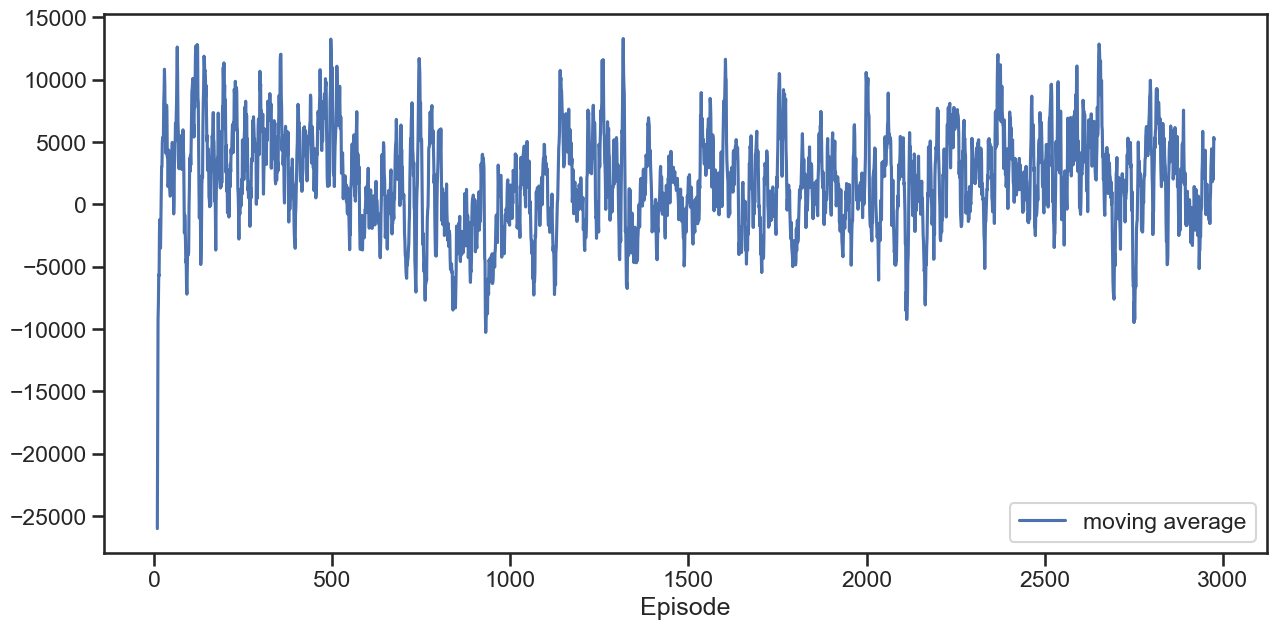

In [3]:
rewards_df = pd.DataFrame()
rewards_df['reward'] = rewards[:-1]
r = rewards_df.fillna(rewards_df.mean())
moving_avg = r.rolling(window=10).mean()
moving_avg = moving_avg.rename(columns={'reward':'moving average'})
f, ax = plt.subplots(figsize=(15,7))
#r.plot(ax=ax)
moving_avg.plot(ax=ax)
plt.xlabel('Episode')

In [4]:
costs = pkl.load(open('data/output/DDPG/DDPG_dynamic_True_noise_False_rewards_dqn.pkl', "rb"))

In [5]:
costs[-1]

3864.3468953274623

Text(0.5, 0, 'Episode')

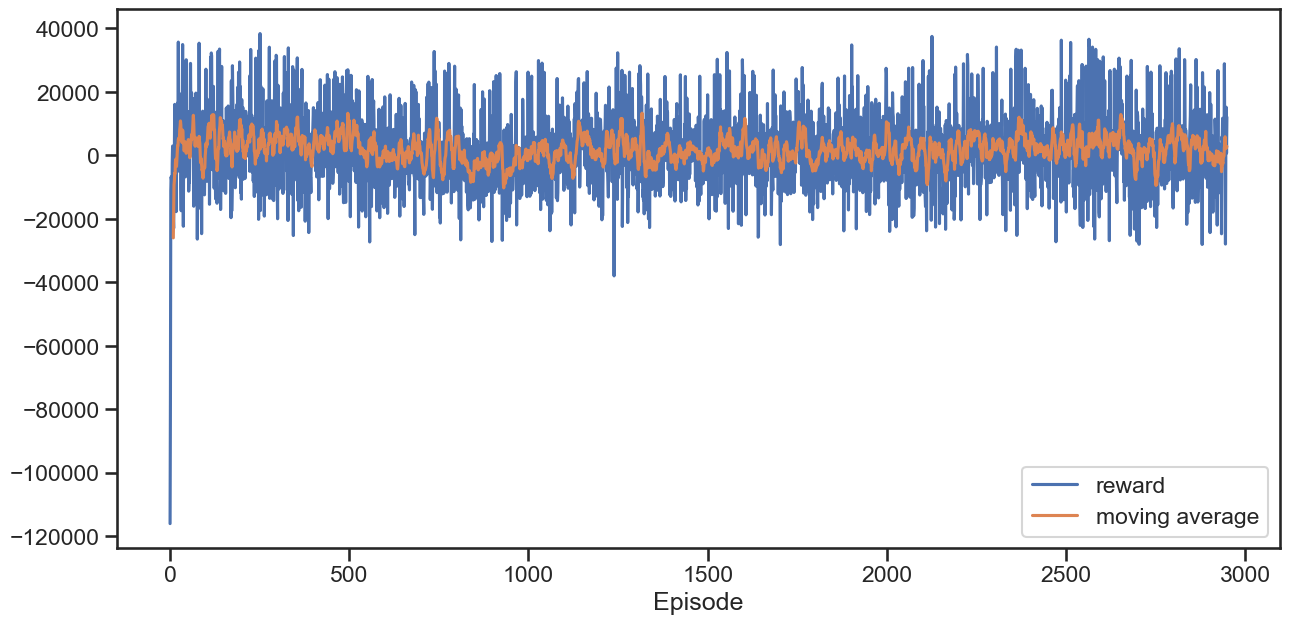

In [6]:
rewards_df = pd.DataFrame()
rewards_df['reward'] = costs[:-1]
r = rewards_df.fillna(rewards_df.mean())
moving_avg = r.rolling(window=10).mean()
moving_avg = moving_avg.rename(columns={'reward':'moving average'})
f, ax = plt.subplots(figsize=(15,7))
r.plot(ax=ax)
moving_avg.plot(ax=ax)
plt.xlabel('Episode')

In [7]:
eval_data = pkl.load(open('data/output/DDPG/DDPG_eval.pkl', 'rb'))

In [8]:
eval_data['Date'] = pd.date_range(start='2014-01-01',end='2014-02-01', periods=len(eval_data))
eval_data.index = eval_data['Date']

In [9]:
rewards_df = pd.DataFrame()
rewards_df['reward'] = rewards[:-1]

In [10]:
r = rewards_df.fillna(rewards_df.mean())

In [11]:
moving_avg = r.rolling(window=10).mean()

In [12]:
moving_avg = moving_avg.rename(columns={'reward':'moving average'})

## Evaluation

In [13]:
eval_data = pkl.load(open('data/output/DDPG/DDPG_eval.pkl', 'rb'))

In [14]:
eval_data

,Actions,Rewards,Action1,Action2,Action3,PV Generation,Datetime,Gas Consumption,Prices,Ammonia,Prices Natural gas,Moles,Storage,Power,Sun Power,Hydrogen,Wind Power,Natural Gas
0,"[0, 0, 0]",0.000000,0,0,0,0.0,2017-02-10 00:00:00,0,49.80,0.0,3.11,10.0,1000000.0,0.000000e+00,0.0,0.0,0,0.0000
1,"[0.0, 1.0, 1.5847466e-11]",-18.309722,0.0,1.0,1.5847466e-11,0.0,2017-02-10 01:00:00,0,49.80,10000.0,3.11,0.0,0.0,9.000000e-01,0.0,0.0,0,481.0396
2,"[0.0, 1.0, 1.36682506e-11]",26.496410,0.0,1.0,1.36682506e-11,0.0,2017-02-10 02:00:00,0,46.30,10000.0,3.11,0.0,0.0,2.733650e-10,0.0,0.0,0,481.2000
3,"[0.0, 1.0, 1.8996985e-11]",26.496410,0.0,1.0,1.8996985e-11,0.0,2017-02-10 03:00:00,0,45.60,10000.0,3.11,0.0,0.0,3.799397e-10,0.0,0.0,0,481.2000
4,"[0.0, 1.0, 1.8999954e-11]",26.496410,0.0,1.0,1.8999954e-11,0.0,2017-02-10 04:00:00,0,45.60,10000.0,3.11,0.0,0.0,3.799991e-10,0.0,0.0,0,481.2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
332,"[0.0, 1.0, 2.4244412e-15]",32.917543,0.0,1.0,2.4244412e-15,0.0,2017-02-23 20:00:00,0,59.60,10000.0,2.63,0.0,0.0,4.848882e-14,0.0,0.0,0,481.2000
333,"[0.0, 1.0, 2.7913542e-16]",32.917543,0.0,1.0,2.7913542e-16,0.0,2017-02-23 21:00:00,0,58.01,10000.0,2.63,0.0,0.0,5.582708e-15,0.0,0.0,0,481.2000
334,"[0.0, 1.0, 9.95409e-18]",32.917543,0.0,1.0,9.95409e-18,0.0,2017-02-23 22:00:00,0,52.57,10000.0,2.63,0.0,0.0,1.990818e-16,0.0,0.0,0,481.2000
335,"[0.0, 1.0, 2.8077337e-18]",32.917543,0.0,1.0,2.8077337e-18,0.0,2017-02-23 23:00:00,0,49.11,10000.0,2.63,0.0,0.0,5.615467e-17,0.0,0.0,0,481.2000


In [15]:
#eval_data['Sun Power'] = eval_data_sun['Sun Power']/3

In [16]:
eval_data['Date'] = pd.date_range(start='2019-05-01',end='2020-04-30', periods=len(eval_data))
eval_data.index = eval_data['Date']

In [17]:


costs_ddpg = sum(np.maximum(0, eval_data['Prices'])*eval_data['Power'])
profit_ddpg = sum(np.minimum(0, eval_data['Prices'])*eval_data['Power'])
ammonia_produced = sum(eval_data['Ammonia'])

print(ammonia_produced)
print(profit_ddpg)
print(costs_ddpg)


costs_gas = sum(eval_data['Natural Gas'])

produced_hydrogen = sum(eval_data['Hydrogen'])
sum_cost = costs_gas + costs_ddpg

d = {
    'col1': [1],
    'Earnings from grid': "$ {:0,.2f}".format(costs_ddpg), 
    'Cost Gas': "$ {:0,.2f}".format(costs_gas),
    'Hydrogen Produced': "{:0,.2f} kg/H2".format(produced_hydrogen),
    'Sum': "$ {:0,.2f}".format(sum_cost)
}
df = pd.DataFrame(data=d)
df

3360000.0
0.0
-155593.1151094572


,col1,Earnings from grid,Cost Gas,Hydrogen Produced,Sum
0,1,"$ -155,593.12","$ 103,198.64","40,107.75 kg/H2","$ -52,394.47"


In [2]:
cost_ddpg

NameError: name 'cost_ddpg' is not defined

In [1]:

cost_ddpg = eval_data['Cost'].sum()


cost_ddpg_gas = (eval_data['Prices Natural gas'] * cost_ddpg['Natural Gas']).sum() 




positive_power_rows = eval_data[eval_data['Power'] > 0]
cost_ddpg_energy = (positive_power_rows['Prices'] * positive_power_rows['Power']).sum()


hydrogen_ddpg = eval_data['Hydrogen'].sum()


profit_ddpg = eval_data['Profits'].sum() * 300



df = pd.DataFrame({
    'Algorithm': ['PPO', 'A2C', 'DDPG', 'TD3', 'DDPG (custom)'],
    'Strom': [cost_ddpg_energy],
    'Gas': [cost_ddpg_gas],
    'Total Cost': [cost_ddpg_gas],
    'Ammonia Profit': [cost_ddpg_gas],
    'Hydrogen': [hydrogen_ddpg]
})


df['Strom'] = df['Strom'].apply(lambda x: "$ {:0,.2f}".format(x))
df['Gas'] = df['Gas'].apply(lambda x: "$ {:0,.2f}".format(x))
df['Ammonia Profit'] = df['Ammonia Profit'].apply(lambda x: "$ {:0,.2f}".format(x))
df['Total Cost'] = df['Total Cost'].apply(lambda x: "$ {:0,.2f}".format(x))
df['Hydrogen'] = df['Hydrogen'].apply(lambda x: "{:0,.2f} kg".format(x))

print(df)

NameError: name 'eval_data' is not defined

/var/folders/56/zg0fn3gn6l9f7bd64sff_jjc0000gn/T/ipykernel_52018/1432339469.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  one_week['Storage_mw'] = one_week['Action1']*1e-6
/var/folders/56/zg0fn3gn6l9f7bd64sff_jjc0000gn/T/ipykernel_52018/1432339469.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  one_week['Moles'] = one_week['Moles']*0.0101
/var/folders/56/zg0fn3gn6l9f7bd64sff_jjc0000gn/T/ipykernel_52018/1432339469.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fro

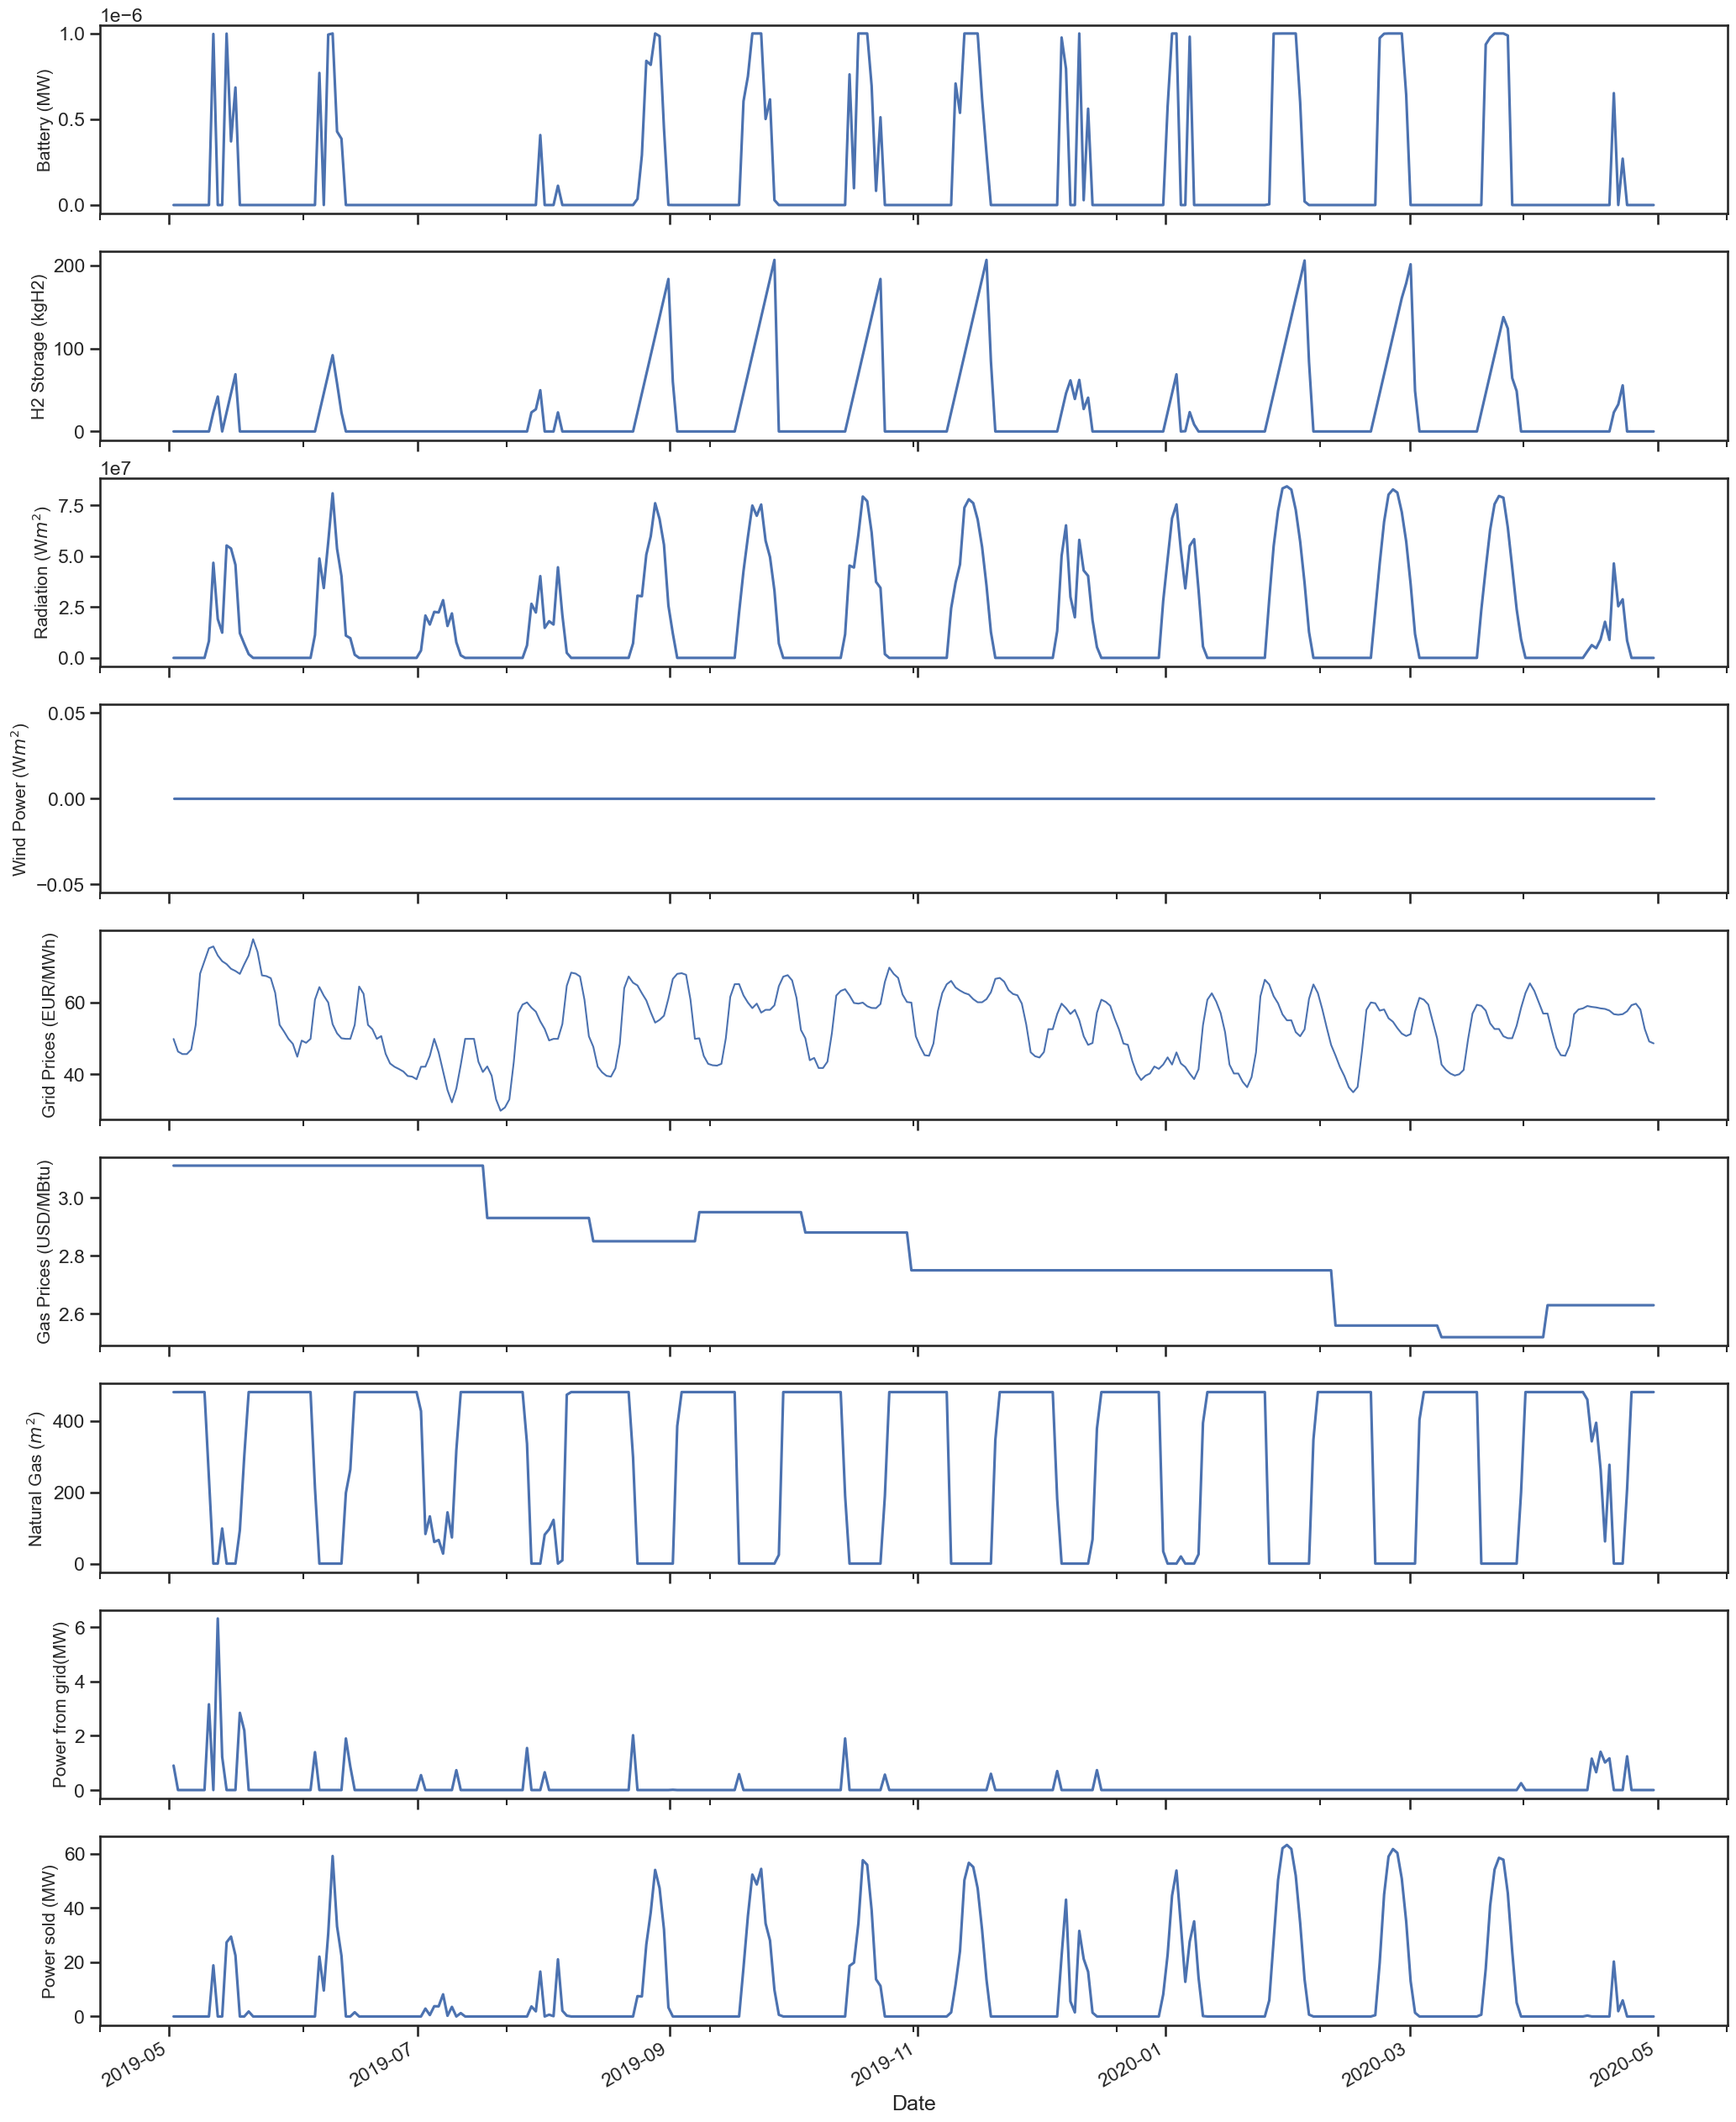

In [18]:
f, axs = plt.subplots(9,figsize=(25,35), sharex=True) #nrows=1, ncols=2,
one_week = eval_data.iloc[1:]
#df = df.iloc[3:]


one_week['Storage_mw'] = one_week['Action1']*1e-6
one_week['Storage_mw'].plot(ax=axs[0], legend=False)

axs[0].set_ylabel('Battery (MW)', fontsize='small')
#axs[0].set_title('Battery')

one_week['Moles'] = one_week['Moles']*0.0101
one_week['Moles'].plot(ax=axs[1], legend=False)
axs[1].set_ylabel('H2 Storage (kgH2)', fontsize='small')
#axs[1].set_title('H2 Storage')

one_week['PV Generation'].plot(ax=axs[2], legend=False)
axs[2].set_ylabel('Radiation (W$m^2$) ', fontsize='small')

one_week['Wind Power'].plot(ax=axs[3], legend=False)
axs[3].set_ylabel('Wind Power (W$m^2$) ', fontsize='small')
#axs[2].set_title('Sun Power')

one_week['Prices'].plot(ax=axs[4], linewidth=1.5)
axs[4].set_ylabel('Grid Prices (EUR/MWh)', fontsize='small')

one_week['Prices Natural gas'].plot(ax=axs[5], legend=False)
#axs[5].set_title('Natural Gas')
axs[5].set_ylabel('Gas Prices (USD/MBtu)', fontsize='small')

one_week['Natural Gas'].plot(ax=axs[6], legend=False)
#axs[5].set_title('Natural Gas')
axs[6].set_ylabel('Natural Gas ($m^2$)', fontsize='small')

one_week['Power sold(W)'] = eval_data['Power']
one_week['Power sold(W)'] = np.maximum(0, one_week['Power sold(W)'])
one_week['Power sold(W)'].plot(ax=axs[7], legend=False)
#axs[6].set_title('Power from grid')
axs[7].set_ylabel('Power from grid(MW)', fontsize='small')

one_week['Power sold (MW)'] = eval_data['Power']
one_week['Power sold (MW)'] = abs(np.minimum(0, one_week['Power sold (MW)']))
one_week['Power sold (MW)'].plot(ax=axs[8], legend=False)
#axs[7].set_title('Power sold (MW)')
axs[8].set_ylabel('Power sold (MW)', fontsize='small')



plt.subplots_adjust(hspace=0.2)
plt.savefig('data/output/DDPG/images/simulation_result.jpg',  dpi=400, bbox_inches='tight')


In [19]:
eval_data_ddpg = pkl.load(open('data/output/DDPG/DDPG_eval.pkl', 'rb'))

Battery Storage

NameError: name 'plot_data' is not defined

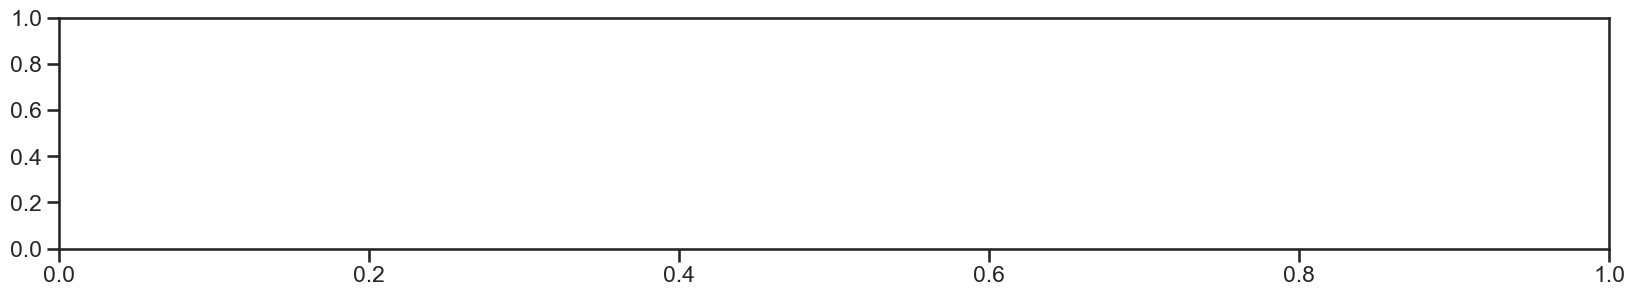

In [20]:
fig,ax = plt.subplots(figsize=(20,3), sharex=True, nrows=1, ncols=1)
#plt.rcParams["font.family"] = "Times New Roman"
#plt.style.use('grayscale')
ax.grid(False)

ax.plot(plot_data['Action1'], color='0', label = 'Battery Storage')
ax.set_xlabel("Date")
ax.set_ylabel("Batter Storage (W)")

ax2=ax.twinx()
ax2.plot(plot_data['Action2'], linestyle='dashed', label = 'PV Generation')
ax2.set_ylabel("PV system power (W)", color='tab:blue')

plt.savefig('data/output/DDPG/images/Battery_Radiation_aug21.jpg',  dpi=400, bbox_inches='tight')
plt.show()

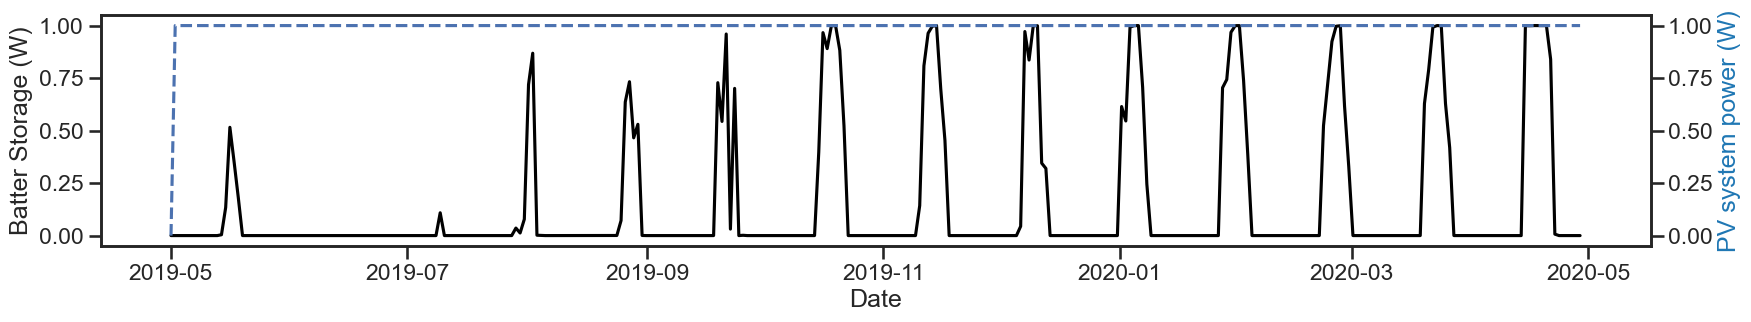

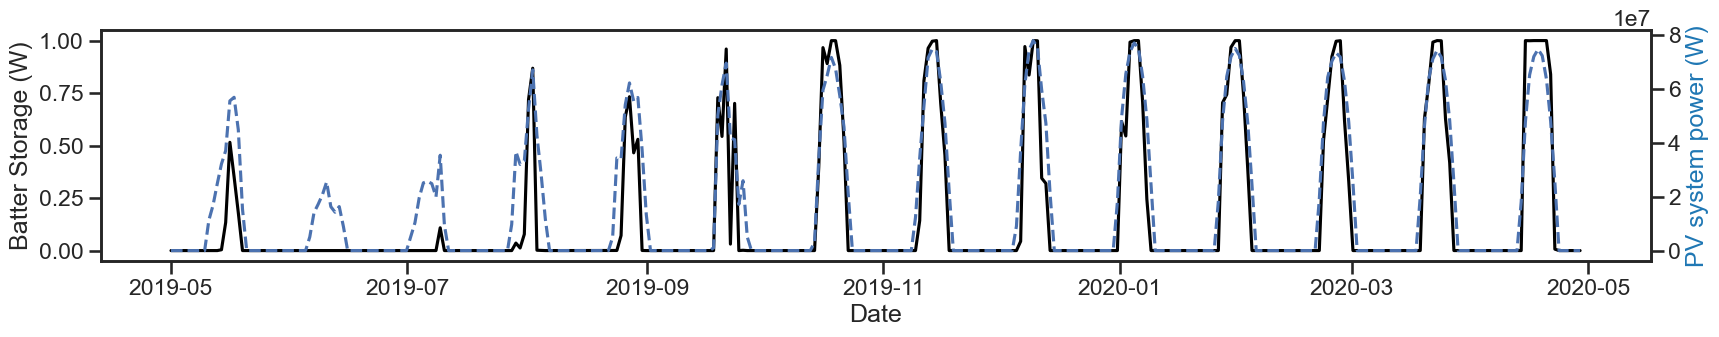

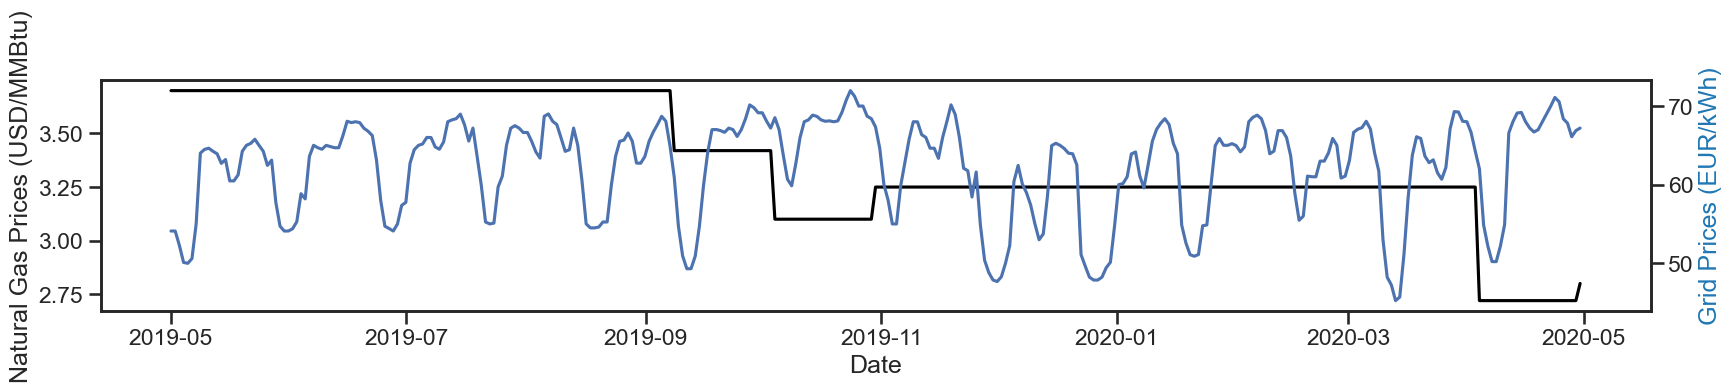

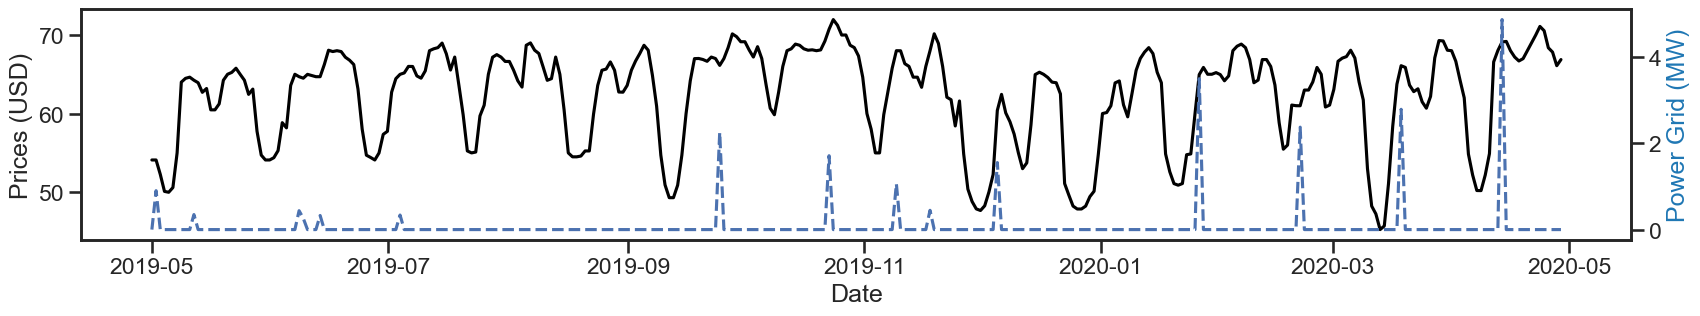

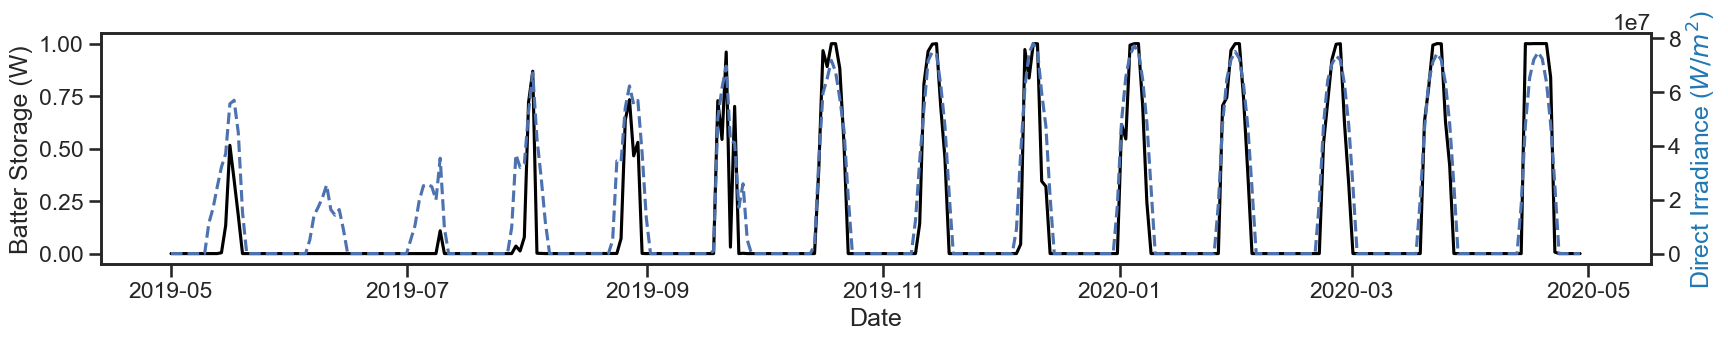

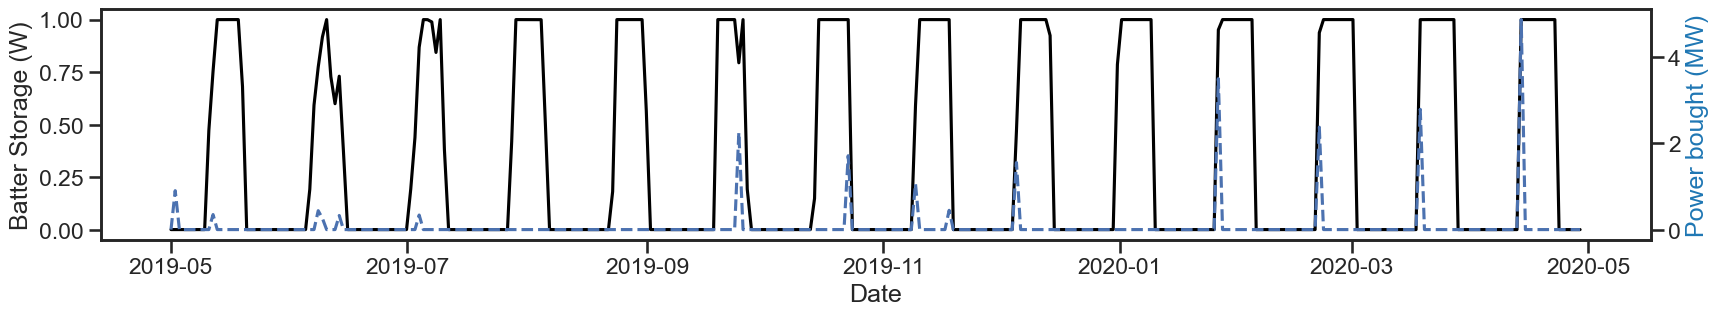

In [ ]:
'''

plot_data = eval_data.iloc[0+2190*3:7*24+2190*3]
plot_data2 = eval_data.iloc[0+2190:7*24+2190]
plot_data3 = eval_data.iloc[0+2190*3:7*24+2190*3]
plot_data4 = eval_data.iloc[0+2190*3-42*24:7*24+2190*3-42*24]
'''
plot_data = eval_data.iloc[0:24*7*2]
plot_data2 = eval_data.iloc[0:24*7*2]
plot_data3 = eval_data.iloc[0:24*7*2]
plot_data4 = eval_data.iloc[0:24*7*2]

fig,ax = plt.subplots(figsize=(20,3), sharex=True, nrows=1, ncols=1)
#plt.rcParams["font.family"] = "Times New Roman"
#plt.style.use('grayscale')
ax.grid(False)

ax.plot(plot_data['Action1'], color='0', label = 'Battery Storage')
ax.set_xlabel("Date")
ax.set_ylabel("Batter Storage (W)")

ax2=ax.twinx()
ax2.plot(plot_data['Action2'], linestyle='dashed', label = 'PV Generation')
ax2.set_ylabel("PV system power (W)", color='tab:blue')

plt.savefig('data/output/DDPG/images/Battery_Radiation_aug21.jpg',  dpi=400, bbox_inches='tight')
plt.show()

fig,ax = plt.subplots(figsize=(20,3), sharex=True, nrows=1, ncols=1)
#plt.rcParams["font.family"] = "Times New Roman"
#plt.style.use('grayscale')
ax.grid(False)

ax.plot(plot_data2['Action1'], color='0', label = 'Battery Storage')
ax.set_xlabel("Date")
ax.set_ylabel("Batter Storage (W)")

ax2=ax.twinx()
ax2.plot(plot_data2['PV Generation'], linestyle='dashed', label = 'PV Generation')
ax2.set_ylabel("PV system power (W)", color='tab:blue')
plt.savefig('data/output/DDPG/images/Battery_Radiation_feb21.jpg',  dpi=400, bbox_inches='tight')

plt.show()

fig,ax = plt.subplots(figsize=(20,3), sharex=True, nrows=1, ncols=1)
#plt.rcParams["font.family"] = "Times New Roman"
#plt.style.use('grayscale')
ax.grid(False)

ax.plot(eval_data['Prices Natural gas'], color='0', label = 'Grid Prices')
ax.set_xlabel("Date")
ax.set_ylabel("Natural Gas Prices (USD/MMBtu)")

ax3=ax.twinx()
ax3.plot(eval_data['Prices'], label = 'Power from Grid')
ax3.set_ylabel("Grid Prices (EUR/kWh)", color='tab:blue')
plt.savefig('data/output/DDPG/images/prices_grid.jpg',  dpi=400, bbox_inches='tight')
plt.show()


fig,ax = plt.subplots(figsize=(20,3), sharex=True, nrows=1, ncols=1)
#plt.rcParams["font.family"] = "Times New Roman"
#plt.style.use('grayscale')
ax.grid(False)


ax.plot(plot_data4['Prices'], color='0', label = 'Grid Prices')
ax.set_xlabel("Date")
ax.set_ylabel("Prices (USD)")

ax2=ax.twinx()
ax2.plot(np.maximum(0, plot_data4['Power']), linestyle='dashed', label = 'Power from Grid')
ax2.set_ylabel("Power Grid (MW)", color='tab:blue')
plt.savefig('data/output/DDPG/images/prices_grid_highlighted.jpg',  dpi=400, bbox_inches='tight')
plt.show()

fig,ax = plt.subplots(figsize=(20,3), sharex=True, nrows=1, ncols=1)
#plt.rcParams["font.family"] = "Times New Roman"
#plt.style.use('grayscale')
ax.grid(False)

ax.plot(plot_data4['Action1'], color='0', label = 'Battery Storage')
ax.set_xlabel("Date")
ax.set_ylabel("Batter Storage (W)")

ax2=ax.twinx()
ax2.plot(plot_data4['PV Generation'], linestyle='dashed', label = 'PV Generation')
ax2.set_ylabel("Direct Irradiance ($W/m^2$)", color='tab:blue')

plt.savefig('data/output/DDPG/images/Battery_Radiation_highlighted.jpg',  dpi=400, bbox_inches='tight')
plt.show()

fig,ax = plt.subplots(figsize=(20,3), sharex=True, nrows=1, ncols=1)
ax.plot(plot_data4['Action3'], color='0', label = 'Battery Storage')
ax.set_xlabel("Date")
ax.set_ylabel("Batter Storage (W)")

ax2=ax.twinx()

ax2.plot(np.maximum(0, plot_data4['Power']), linestyle='dashed', label = 'PV Generation')
ax2.set_ylabel("Power bought (MW)", color='tab:blue')

plt.savefig('data/output/DDPG/images/Battery_EnergyGrid.jpg',  dpi=400, bbox_inches='tight')
plt.show()





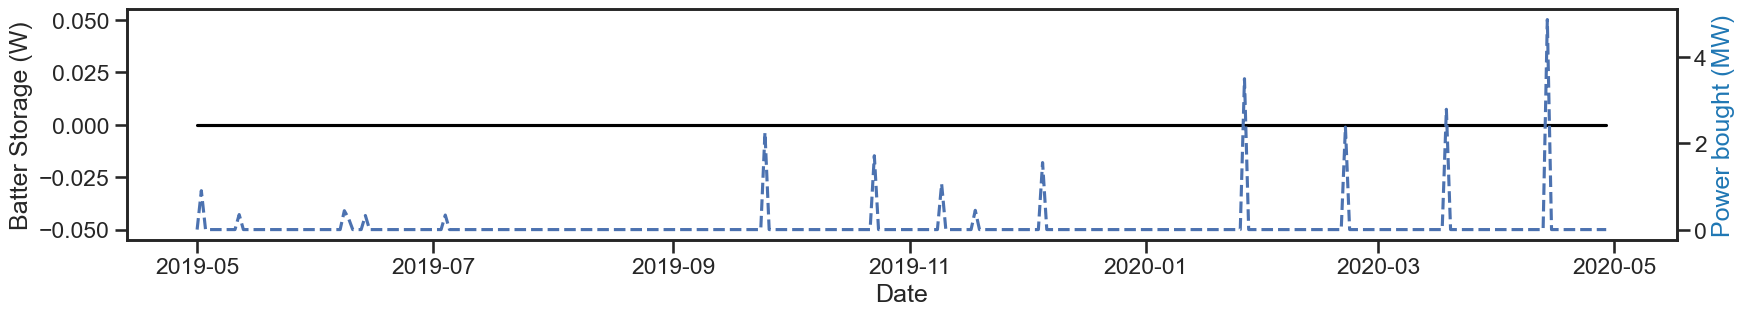

In [ ]:
fig,ax = plt.subplots(figsize=(20,3), sharex=True, nrows=1, ncols=1)
ax.plot(plot_data4['Action3']//np.maximum(0.1, plot_data4['Hydrogen']), color='0', label = 'Battery Storage')
ax.set_xlabel("Date")
ax.set_ylabel("Batter Storage (W)")

ax2=ax.twinx()

ax2.plot(np.maximum(0, plot_data4['Power']), linestyle='dashed', label = 'PV Generation')
ax2.set_ylabel("Power bought (MW)", color='tab:blue')

plt.savefig('data/output/DDPG/images/Battery_EnergyGrid.jpg',  dpi=400, bbox_inches='tight')
plt.show()


Average price

In [ ]:

print("Average Grid Prices:", np.average(plot_data4['Prices']))
power = np.maximum(0, plot_data4['Power']* plot_data4['Prices'])
print("Average Buy Prices:", np.average(power) )



Average Grid Prices: 62.29276785714286
Average Buy Prices: 4.509169210246442


### Electrolyzer

## Policy Evaluation

In [ ]:
policy_data = pkl.load(open('data/output/DDPG/DDPG_policy_eval.pkl', 'rb'))

FileNotFoundError: [Errno 2] No such file or directory: 'data/output/DDPG/DDPG_policy_eval.pkl'

In [ ]:
policy_data

: 

In [ ]:
fig,ax = plt.subplots(figsize=(20,3), sharex=True, nrows=1, ncols=1)
ax.plot(policy_data['action1'], color='0', label = 'Battery Storage')
ax.set_xlabel("Date")
ax.set_ylabel("Batter Storage (W)")

ax2=ax.twinx()

ax2.plot(np.maximum(0, policy_data['Grid Prices']), linestyle='dashed', label = 'PV Generation')
ax2.set_ylabel("Power bought (MW)", color='tab:blue')

plt.savefig('data/output/DDPG/images/Battery_EnergyGrid.jpg',  dpi=400, bbox_inches='tight')
plt.show()

: 

In [ ]:
# Angenommen, Sie haben einen DataFrame namens df

df = pd.DataFrame({
    'Action1': policy_data['action1'],
    'Grid Prices': policy_data['Grid Prices']
})

# Erstellt eine Korrelationsmatrix
correlation_matrix = df.corr()

# Erstellt den Heatmap mit seaborn
plt.figure(figsize=(10,8))
plt.scatter(df['Action1'], df['Grid Prices'])

plt.show()

: 

In [ ]:


plt.plot(policy_data['action1'], policy_data['Grid Prices'])
plt.show()


: 

: 

In [ ]:
style.use('seaborn')
import numpy as np
fig, axs = plt.subplots(2,3,figsize=(20,15), sharey=True)

selected_times = [10, 12,14]

for i in range(3):
    selected = policy_data[(policy_data['Time'] == selected_times[i]) & (policy_data['Temperatures'] == 20) & (np.round(policy_data['Ambient Temperatures'],1) == 4) & (np.round(policy_data['Battery Level'],1) == 1000)]
    selected.plot.scatter(x='Sun Power', y = 'Prices',c='Battery Action', colormap='hot', colorbar='False', ax = axs[0][i], vmin=-1, vmax=1)
    axs[0][i].set_title('Time {} '.format(selected_times[i]))
    
selected_temperatures = [19, 20, 21]

for i in range(3):
    selected = policy_data[(policy_data['Sun Power'] == 500) & (np.round(policy_data['Inside Temperatures'],1) == selected_temperatures[i]) & (np.round(policy_data['Ambient Temperatures'],1) == -4) & (np.round(policy_data['Battery Level'],1) == 1000)]
    selected.plot.scatter(x='Time', y = 'Prices',c='Battery Action', colormap='hot', colorbar='False', ax = axs[1][i], vmin=-1, vmax=1)
    axs[1][i].set_title('Inside Temperature of {}°C'.format(selected_temperatures[i]))

selected_storage = [1000, 2000, 4000]

#for i in range(3):
#    selected = policy_data[(policy_data['Sun Power'] == 100) & (np.round(policy_data['Inside Temperatures'],1) == 20) & (np.round(policy_data['Ambient Temperatures'],1) == -4) & (np.round(policy_data['Battery Level'],1) == selected_storage[i])]
#    selected.plot.scatter(x='Time', y = 'Prices',c='Battery Action', colormap='hot', colorbar='False', ax = axs[2][i], vmin=-1, vmax=1)
#    axs[2][i].set_title('Battery level of {} Wh'.format(selected_storage[i]))
#fig.colorbar(ims[0], ax=axs)
#plt.savefig('data/output/DDPG_storage/DDPG_storage_policy_eval3D.png',bbox_inches='tight')

: 

In [ ]:
style.use('seaborn')
import numpy as np
fig, axs = plt.subplots(2,3,figsize=(20,15), sharey=True)

selected_times = [10, 12,14]

for i in range(3):
    selected = policy_data[(policy_data['Time'] == selected_times[i]) & (policy_data['Inside Temperatures'] == 20) & (np.round(policy_data['Ambient Temperatures'],1) == 4) & (np.round(policy_data['Battery Level'],1) == 1000)]
    selected.plot.scatter(x='Sun Power', y = 'Prices',c='Battery Action', colormap='hot', colorbar='False', ax = axs[0][i], vmin=-1, vmax=1)
    axs[0][i].set_title('Time {} '.format(selected_times[i]))
    
selected_temperatures = [19, 20, 21]

for i in range(3):
    selected = policy_data[(policy_data['Sun Power'] == 500) & (np.round(policy_data['Inside Temperatures'],1) == selected_temperatures[i]) & (np.round(policy_data['Ambient Temperatures'],1) == -4) & (np.round(policy_data['Battery Level'],1) == 1000)]
    selected.plot.scatter(x='Time', y = 'Prices',c='Battery Action', colormap='hot', colorbar='False', ax = axs[1][i], vmin=-1, vmax=1)
    axs[1][i].set_title('Inside Temperature of {}°C'.format(selected_temperatures[i]))

selected_storage = [1000, 2000, 4000]

: 

In [ ]:
policy_data

: 

In [ ]:
import numpy as np
fig = plt.figure(figsize=(28,12))
#import seaborn as sns
#sns.set('talk', palette='bright')

selected_times = [1,10,12]

for i in range(3):
    selected = policy_data[(policy_data['Time'] == selected_times[i]) & (policy_data['Inside Temperatures'] == 20) & (np.round(policy_data['Ambient Temperatures'],1) == 0) & (np.round(policy_data['Sun Power'],1) == 0)]
    X = selected['Battery Level']
    Y = selected['Prices']
    Z = selected['Battery Action']
    ax = fig.add_subplot(1, 3, i+1, projection='3d')

    ax.plot_trisurf(X, Y, Z, cmap=cm.hot,
                       linewidth=0, antialiased=False, vmin=-1, vmax=1)
    #selected.plot.scatter(x='Sun Power', y = 'Prices',c='Actions', colormap='hot', colorbar='False', ax = axs[0][i], vmin=-1, vmax=1)
    ax.set_title('Time of Day = {} '.format(selected_times[i]), fontsize=30, pad = 20)

    ax.set_ylabel('Prices (€/MWh)', labelpad=20, fontsize=22)
    ax.set_xlabel('Energy (Wh)', labelpad=20, fontsize=22)
    #ax.set_zlabel('Action', labelpad=30, fontsize=23)
    #ax.zaxis.set_tick_params(pad = 20)

    #ax.tick_params(length=30, width = 30, pad = 10)
    #ax.tick_params(axis='z', which='major', pad=20)
    plt.locator_params(axis='x', nbins=6)
    plt.locator_params(axis='y', nbins=6)
    plt.locator_params(axis='z', nbins=6)
    ax.tick_params(axis='z', which='major', pad=20, labelsize=20)
    ax.tick_params(axis='x', which='major', labelsize=20)
    ax.tick_params(axis='y', which='major', labelsize=20)

    ax.set_zlim(-1, 1)

    
plt.subplots_adjust(wspace=0.1)
    
#fig.colorbar(ims[0], ax=axs)
plt.savefig('data/output/DDPG/images/DDPG_storage_policy_eval3D_presentation.png',bbox_inches='tight')

: 

In [ ]:
fig, axs = plt.subplots(1,figsize=(15,7))
selected_times = [1,10,12]

for time in selected_times:
    selected = policy_data[(policy_data['Time'] == time) & (policy_data['Inside Temperatures'] == 20) & (np.round(policy_data['Ambient Temperatures'],1) == 0) & (np.round(policy_data['Sun Power'],1) == 0) & (np.round(policy_data['Prices'],1) == 30)]
    axs.plot(selected['Battery Level'], selected['Battery Action'])
axs.legend(['TOD of {}'.format(selected_times[i]) for i in range(len(selected_times))])
axs.set_xlabel('Energy Level (Wh)')
axs.set_ylabel('Action')
plt.savefig('data/output/DDPG/images/DDPG_storage_policy_presentation.png',bbox_inches='tight')

: 

In [ ]:
import numpy as np
fig = plt.figure(figsize=(28,12))
#import seaborn as sns
#sns.set('talk', palette='bright')

selected_times = [10, 12,14]

for i in range(3):
    selected = policy_data[(policy_data['Time'] == selected_times[i]) & (policy_data['Inside Temperatures'] == 20) & (np.round(policy_data['Ambient Temperatures'],1) == 0) & (np.round(policy_data['Battery Level'],1) == 1000)]
    Y = selected['Sun Power']
    X = selected['Prices']
    Z = selected['Battery Action']
    ax = fig.add_subplot(1, 3, i+1, projection='3d')

    ax.plot_trisurf(X, Y, Z, cmap=cm.hot,
                       linewidth=0, antialiased=False, vmin=-1, vmax=1)
    #selected.plot.scatter(x='Sun Power', y = 'Prices',c='Actions', colormap='hot', colorbar='False', ax = axs[0][i], vmin=-1, vmax=1)
    ax.set_title('Time of Day = {} '.format(selected_times[i]), fontsize=25, pad = 20)

    ax.set_ylabel('Radiation ($W/m^2$)', labelpad=20, fontsize=20)
    ax.set_xlabel('Prices (€/MWh)', labelpad=20, fontsize=19)
    #ax.set_zlabel('Action', labelpad=30, fontsize=23)
    #ax.zaxis.set_tick_params(pad = 20)

    ax.tick_params(length=30, width = 30, pad = 10)
    ax.tick_params(axis='z', which='major', pad=20)
    plt.locator_params(axis='x', nbins=6)
    plt.locator_params(axis='y', nbins=6)
    plt.locator_params(axis='z', nbins=6)

    ax.set_zlim(-1, 1)

    
#selected_sun = [0, 100, 150]

#for i in range(3):
#    selected = policy_data[(policy_data['Sun Power'] == selected_sun[i]) & (np.round(policy_data['Inside Temperatures'],1) == 20) & (np.round(policy_data['Ambient Temperatures'],1) == 0) & (np.round(policy_data['Prices'],0) == 40)]
#    #selected.plot.scatter(x='Time', y = 'Prices',c='Actions', colormap='hot', colorbar='False', ax = axs[1][i], vmin=-1, vmax=1)
#    X = selected['Time']
#    Y = selected['Battery Level']
#    Z = selected['Battery Action']
#    ax = fig.add_subplot(2, 3, i+4, projection='3d')
#
#    ax.plot_trisurf(X, Y, Z, cmap=cm.hot,
#                       linewidth=0, antialiased=False)
#    #selected.plot.scatter(x='Sun Power', y = 'Prices',c='Actions', colormap='hot', colorbar='False', ax = axs[0][i], vmin=-1, vmax=1)
#    ax.set_title('Sun power of {} W/m2'.format(selected_sun[i]))
#    #ax.zaxis._axinfo['label']['space_factor'] = 2.8
#    ax.xaxis._axinfo['label']['space_factor'] = 2.8
#    ax.yaxis._axinfo['label']['space_factor'] = 2.8
#    ax.set_xlabel('Tau')
#    ax.set_ylabel('Battery Level')
#    #ax.set_zlabel('Actions')
#    ax.set_zlim(-1, 1)

    
plt.subplots_adjust(wspace=0.1)
    
#fig.colorbar(ims[0], ax=axs)
plt.savefig('data/output/DDPG/images/DDPG_storage_sun_policy_eval3D.png',bbox_inches='tight')

: 

In [ ]:

fig = plt.figure(figsize=(20,15))
ax = plt.axes(projection='3d')

ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

: 